The data file we have to load is a simple text file. NumPy has a nice `loadtxt` function, but we won't have information about the various columns. Using Pandas' `read_csv` utility requires a bit more extra work (since there are no headers in the data file), but it gives more information about the columns, by providing them with a header.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#data = np.loadtxt('fitness_1010.log', usecols=[2,3,4,5,6])
df = pd.read_csv('fitness_1010.log', names=['Fitness', 'mu_vtst', 'lambda_vtst', 'theta_MFP', 'theta_MSP'],
                 usecols=[2,3,4,5,6], index_col=False, sep='\s+')

Pandas dataframes have a plot method, which allow for quick and simple plots.

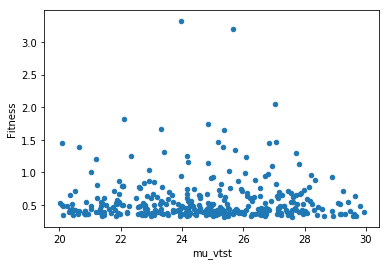

In [3]:
%matplotlib inline
df.plot('mu_vtst', 'Fitness', kind='scatter')

For tinkering with the plot, such as labels and text size, using Matplotlib (or Pyplot) directly is more or less necessary.

In [4]:
import matplotlib.pyplot as plt

Set some limits for the fitness, as well as symbol sizes and colors for each limit range.
The colors are commented-out, so that the figure relies on Matplotlib standard color cycle. This can often even be better, since these colors are picked to avoid problems with e.g. color-blindness as much as possible.

In [5]:
limits = [0, 0.3, 1., 1.3, 1.6, 2, 3.5, 4]
sizes = list(range(2, 2+len(limits)*10, 10))
#colors = ['blue', 'green', 'orange', 'yellow', 'purple', 'cyan', 'red']

Text(0, 0.5, 'Fitness')

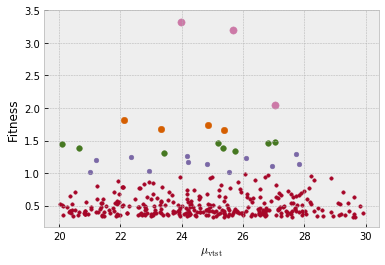

In [6]:
plt.style.use('bmh')
for low, high, size in zip(limits[:-1], limits[1:], sizes):
    selection = (df['Fitness'] >= low) & (df['Fitness'] < high)
    x = df['mu_vtst'][selection]
    y = df['Fitness'][selection]
    plt.scatter(x, y, s=size)
plt.xlabel('$\mu_{\mathrm{vtst}}$')
plt.ylabel('Fitness')

To plot all columns in a nice 2 by 2 figure, we loop over the four columns.

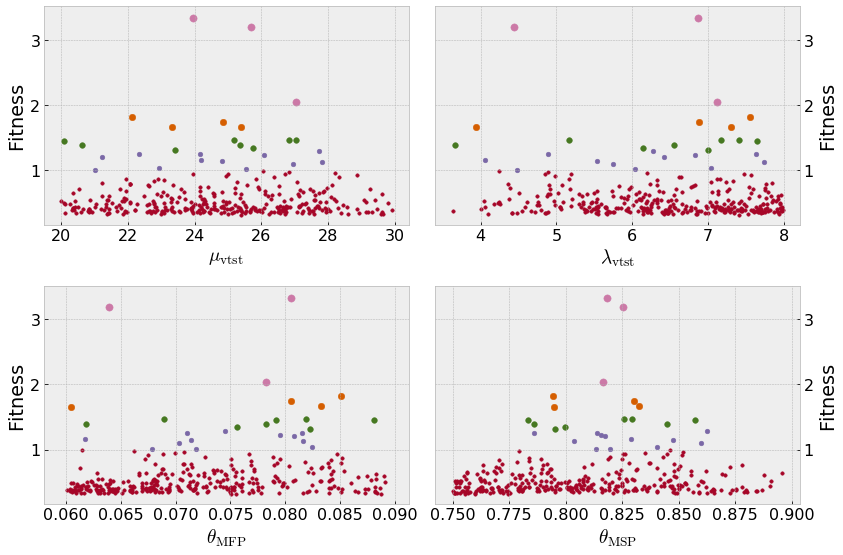

In [7]:
labels = (r'$\mu_{\mathrm{vtst}}$', r'$\lambda_{\mathrm{vtst}}$', 
          r'$\theta_{\mathrm{MFP}}$', r'$\theta_{\mathrm{MSP}}$')
columns = ('mu_vtst', 'lambda_vtst', 'theta_MFP', 'theta_MSP')
fig = plt.subplots(figsize=(12, 8), sharey=True)
plt.rc('font', size=16)
for i, (xlabel, column) in enumerate(zip(labels, columns)):
    ax = plt.subplot(2,2,i+1)
    if i % 2:
      ax.yaxis.tick_right()
      ax.yaxis.set_label_position("right")
    for low, high, size in zip(limits[:-1], limits[1:], sizes):
        selection = (df['Fitness'] >= low) & (df['Fitness'] < high)
        x = df[column][selection]
        y = df['Fitness'][selection]
        plt.scatter(x, y, s=size)
    plt.xlabel(xlabel)
    plt.ylabel('Fitness')
plt.tight_layout()

In [8]:
from pathlib import Path
from collections import OrderedDict

solution_1001.dat
solution_1002.dat
solution_1003.dat
solution_1004.dat
solution_1005.dat
solution_1019.dat


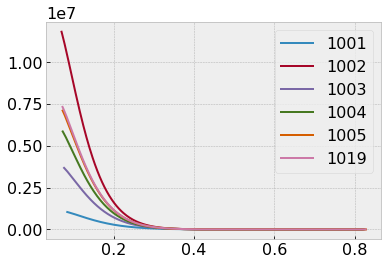

In [9]:
directory = Path('.')
paths = directory.glob('solution_*.dat')
dataset = OrderedDict()
for path in sorted(paths):
    label = path.stem[-4:]
    data = np.loadtxt(path).T  # transpose
    plt.plot(data[0], data[1], '-', label=label)
    dataset[label] = data
plt.legend() ;

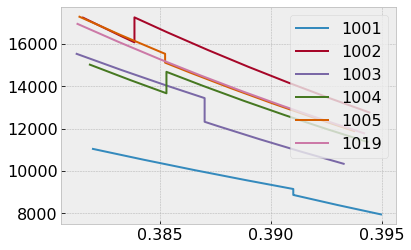

In [10]:
# Zoom in
# Scaling just the x-axis will not work! The y-axis will not be scaled to the new x-range
#plt.xlim(0.39, 0.395)

for label, data in dataset.items():
    selection = (0.38 <= data[0]) & (data[0] <= 0.395)
    plt.plot(data[0][selection], data[1][selection], '-', label=label)
plt.legend(loc='upper right') ;